## Fixed Length Record Reader

In [42]:
import tensorflow as tf
import os
%matplotlib inline
import matplotlib.pyplot as plt

### Utilities

In [10]:
def run_tf(x):
    with tf.Session() as sess:    
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)

        out = sess.run(x)

        coord.request_stop()
        coord.join(threads)
        
        return out

### Get the data path

In [12]:
data_dir = "/home/sankaran/exercise/ML/TF-Exercise/Tutorials/CIFAR/cifar-10-batches-bin"
filenames = [os.path.join(data_dir, 'data_batch_%d.bin' % i) for i in range(1, 6)]
filenames

['/home/sankaran/exercise/ML/TF-Exercise/Tutorials/CIFAR/cifar-10-batches-bin/data_batch_1.bin',
 '/home/sankaran/exercise/ML/TF-Exercise/Tutorials/CIFAR/cifar-10-batches-bin/data_batch_2.bin',
 '/home/sankaran/exercise/ML/TF-Exercise/Tutorials/CIFAR/cifar-10-batches-bin/data_batch_3.bin',
 '/home/sankaran/exercise/ML/TF-Exercise/Tutorials/CIFAR/cifar-10-batches-bin/data_batch_4.bin',
 '/home/sankaran/exercise/ML/TF-Exercise/Tutorials/CIFAR/cifar-10-batches-bin/data_batch_5.bin']

### Create file name queue

In [13]:
# Create a queue that produces the filenames to read.
filename_queue = tf.train.string_input_producer(filenames)

### Create Fixed Length Record Reader with fixed number of bytes to read

Each example of CIFAR is 3*32*32 (for image) + 1 (for label) bytes

In [14]:
record_bytes = 32*32*3+1
reader = tf.FixedLengthRecordReader(record_bytes=record_bytes)

In [15]:
key, value = reader.read(filename_queue)

In [16]:
k,v = run_tf([key,value])

### Decode

In [19]:
type(v)

bytes

In [20]:
decoded = tf.decode_raw(v, tf.uint8)

In [27]:
run_tf(decoded).shape

(3073,)

Note that images are 3x32x32

In [40]:
label = tf.strided_slice(decoded,[0],[1])  #Can also be : decoded[0]
image = tf.strided_slice(decoded,[1],[record_bytes]) # decoded[1:]

label = tf.cast(label,tf.int32)
image = tf.reshape(image,[3,32,32])
image = tf.transpose(image,[1,2,0])

In [41]:
image.shape

TensorShape([Dimension(32), Dimension(32), Dimension(3)])

### Visulaize

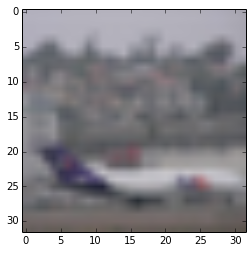

In [45]:
img_np = run_tf(image)
plt.imshow(img_np)

### Consolidated code

[6]


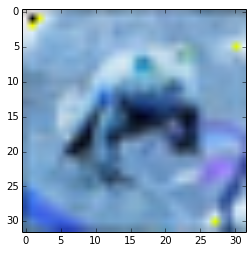

In [54]:
# Create a queue that produces the filenames to read.
filename_queue = tf.train.string_input_producer(filenames)

#Create FixedLenthRecord Reader with fixed bytes to read
record_bytes = 32*32*3+1 #32*32*3 image with 1 byte for label
reader = tf.FixedLengthRecordReader(record_bytes=record_bytes)

key, value = reader.read(filename_queue)

##Decode
decoded = tf.decode_raw(value, tf.uint8)
label = tf.strided_slice(decoded,[0],[1])
image = tf.strided_slice(decoded,[1],[record_bytes])

#Can also be decoded this way
# label = decoded[0]
# image = decoded[1:]

## Preprocess
label = tf.cast(label,tf.int32)
image = tf.reshape(image,[3,32,32])
image = tf.transpose(image,[1,2,0])
image = tf.cast(image,tf.float32)

##get image
im, l = run_tf([image,label])
print(l)
plt.imshow(im)

### Every run produces different examples (under same session)

In [ ]:
sess = tf.InteractiveSession()

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

im, l = sess.run([image,label])
print(l)
plt.imshow(im)

[1]


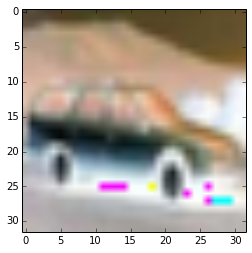

In [72]:
im, l = sess.run([image,label])
print(l)
plt.imshow(im)

In [73]:
coord.request_stop()
coord.join(threads)
sess.close()